### Import Libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
from scipy import stats

C:\Users\johan\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.8, the latest is 0.3.10.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


## Background
Sending email is one of the alternatives used by Shopee to tell and promote certain event sale to users. With the ability to be able to predict whether user is reading or not reading the email, enable Shopee to evaluate their crew works during campaign period until event launch. This is because, when user is open the email, the possibility of that user know there is an event or promo will be highly increased and also increasing the possibility of that user do transaction during event period. Therefore, with the making of this model, hopefully Shopee able to build a strategy for future marketing.

__Source__ : <a href='https://www.kaggle.com/davydev/shopee-code-league-20/tasks?taskId=1574'>Kaggle</a>


## Goals
The goals of this project is to build model that able to predict whether user is going to read the email sent by Shopee. In this case, Shopee's priority is user.



## Data Used
- 18 columns and 73539 rows for train data
- 6 columns and 127886 rows for user data

## Train Data Information
1. country_code = Code Number of Country in Shopee's user
1. grass_date = Date when the email was sent
1. user_id = Unique number each user
1. subject_line_length = Character Length for subject of email sent
1. last_open_day = How many days this user last open his email
1. last_login_day = How many days this user last open his Shopee account
1. last_checkout_day = How many days this user last checkout at his Shopee account
1. open_count_last_[10/30/60]_ days = Total email that open during N days
1. login_count_last_[10/30/60]_ days = Total times this user open his Shopee account during N days
1. checkout_count_last_[10/30/60]_ days = Total times this checkout from his Shopee account during N days
1. open_flag = __Target Variable__ Whether this user open his email or not
1. row_id = Row number 

## User Data Information
1. user_id = Unique number each user
1. attr_[1/2] = General attribute each user. Boolean type
1. attr_3 = General attribute each user. Int type
1. age = age of the user
1. domain = domain email of each user

### Data Train

In [2]:
train = pd.read_csv('./static/train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73539 entries, 0 to 73538
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country_code                 73539 non-null  int64 
 1   grass_date                   73539 non-null  object
 2   user_id                      73539 non-null  int64 
 3   subject_line_length          73539 non-null  int64 
 4   last_open_day                73539 non-null  object
 5   last_login_day               73539 non-null  object
 6   last_checkout_day            73539 non-null  object
 7   open_count_last_10_days      73539 non-null  int64 
 8   open_count_last_30_days      73539 non-null  int64 
 9   open_count_last_60_days      73539 non-null  int64 
 10  login_count_last_10_days     73539 non-null  int64 
 11  login_count_last_30_days     73539 non-null  int64 
 12  login_count_last_60_days     73539 non-null  int64 
 13  checkout_count_last_10_days  73

In [3]:
train.head()

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag,row_id
0,4,2019-07-16 00:00:00+08:00,43,44,19,6,18,0,2,4,12,43,99,0,5,10,0,0
1,4,2019-07-16 00:00:00+08:00,102,44,9,4,8,2,9,17,18,48,90,1,1,4,1,1
2,6,2019-07-16 00:00:00+08:00,177,49,14,5,5,0,4,12,24,69,119,5,19,27,0,2
3,1,2019-07-16 00:00:00+08:00,184,49,49,9,53,0,0,1,9,23,69,1,3,6,0,3
4,6,2019-07-16 00:00:00+08:00,221,49,227,6,221,0,0,0,2,5,5,0,0,0,0,4


### Data User

In [4]:
user = pd.read_csv('./static/users.csv')
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127886 entries, 0 to 127885
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  127886 non-null  int64  
 1   attr_1   78987 non-null   float64
 2   attr_2   127439 non-null  float64
 3   attr_3   127886 non-null  float64
 4   age      78987 non-null   float64
 5   domain   127886 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 5.9+ MB


In [5]:
user.head()

,user_id,attr_1,attr_2,attr_3,age,domain
0,0,NaN,1.0,0.0,NaN,@gmail.com
1,1,1.0,1.0,2.0,50.0,@gmail.com
2,2,NaN,1.0,0.0,NaN,other
3,3,NaN,1.0,0.0,NaN,@gmail.com
4,4,1.0,1.0,2.0,33.0,@gmail.com


## Merge train & user

In [6]:
gabung = pd.merge(train,user,on='user_id')
gabung.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73539 entries, 0 to 73538
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   country_code                 73539 non-null  int64  
 1   grass_date                   73539 non-null  object 
 2   user_id                      73539 non-null  int64  
 3   subject_line_length          73539 non-null  int64  
 4   last_open_day                73539 non-null  object 
 5   last_login_day               73539 non-null  object 
 6   last_checkout_day            73539 non-null  object 
 7   open_count_last_10_days      73539 non-null  int64  
 8   open_count_last_30_days      73539 non-null  int64  
 9   open_count_last_60_days      73539 non-null  int64  
 10  login_count_last_10_days     73539 non-null  int64  
 11  login_count_last_30_days     73539 non-null  int64  
 12  login_count_last_60_days     73539 non-null  int64  
 13  checkout_count_l

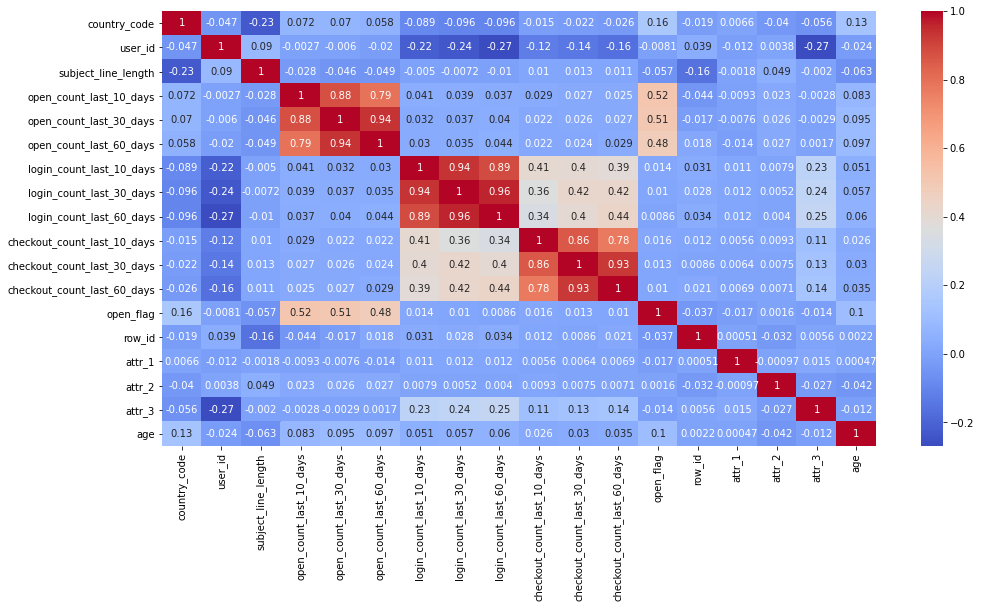

In [7]:
plt.figure(figsize=(16,8))
sns.heatmap(gabung.corr(),annot=True,cmap='coolwarm')
plt.show()

In [8]:
gabung.corr()['open_flag'].sort_values(ascending=False)*100

open_flag                      100.000000
open_count_last_10_days         51.530727
open_count_last_30_days         50.785347
open_count_last_60_days         47.776649
country_code                    15.894524
age                             10.350701
checkout_count_last_10_days      1.557345
login_count_last_10_days         1.402338
checkout_count_last_30_days      1.341893
checkout_count_last_60_days      1.023110
login_count_last_30_days         1.013371
login_count_last_60_days         0.863277
attr_2                           0.160516
user_id                         -0.808246
attr_3                          -1.423477
attr_1                          -1.674172
row_id                          -3.744330
subject_line_length             -5.735699
Name: open_flag, dtype: float64

In [9]:
gabung.head()

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,...,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag,row_id,attr_1,attr_2,attr_3,age,domain
0,4,2019-07-16 00:00:00+08:00,43,44,19,6,18,0,2,4,...,0,5,10,0,0,1.0,1.0,2.0,47.0,@gmail.com
1,4,2019-07-16 00:00:00+08:00,102,44,9,4,8,2,9,17,...,1,1,4,1,1,1.0,1.0,2.0,25.0,@hotmail.com
2,6,2019-07-16 00:00:00+08:00,177,49,14,5,5,0,4,12,...,5,19,27,0,2,NaN,1.0,0.0,NaN,@yahoo.com
3,1,2019-07-16 00:00:00+08:00,184,49,49,9,53,0,0,1,...,1,3,6,0,3,1.0,1.0,2.0,24.0,@yahoo.com
4,6,2019-07-16 00:00:00+08:00,221,49,227,6,221,0,0,0,...,0,0,0,0,4,NaN,1.0,0.0,NaN,@hotmail.com


In [10]:
gabung.describe()

,country_code,user_id,subject_line_length,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag,row_id,attr_1,attr_2,attr_3,age
count,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.00000,45347.000000,73260.000000,73539.000000,45347.000000
mean,2.533159,63048.595358,43.656373,0.911829,2.780457,5.019364,8.382287,25.284053,49.010430,0.909898,2.796040,5.420960,0.155781,36769.00000,0.999757,0.997256,1.077863,31.445564
std,1.675251,36068.006037,11.219323,1.754052,4.570239,7.902313,13.424436,37.853189,71.819327,2.887416,7.686064,13.980182,0.362650,21229.02506,0.015573,0.052308,1.035252,11.797405
min,1.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-17.000000
25%,1.000000,31679.500000,34.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,18384.50000,1.000000,1.000000,0.000000,24.000000
50%,2.000000,63340.000000,43.000000,0.000000,1.000000,2.000000,3.000000,11.000000,22.000000,0.000000,0.000000,1.000000,0.000000,36769.00000,1.000000,1.000000,1.000000,29.000000
75%,3.000000,94731.500000,52.000000,1.000000,3.000000,6.000000,12.000000,35.000000,69.000000,1.000000,3.000000,6.000000,0.000000,55153.50000,1.000000,1.000000,2.000000,36.000000
max,7.000000,127925.000000,75.000000,31.000000,92.000000,135.000000,254.000000,735.000000,1260.000000,157.000000,531.000000,783.000000,1.000000,73538.00000,1.000000,1.000000,4.000000,118.000000


# 1. Feature Engineering

## A. Country_code

<img src='./interface/Negara.jpeg'>

Country Code : 
- 1 : Singapore
- 2 : Malaysia
- 3 : Indonesia
- 4 : Philippines
- 5 : Taiwan
- 6 : Thailand
- 7 : Vietnam

In [11]:
gabung['country']=pd.cut(gabung['country_code'],[0,1,2,3,4,5,6,7],labels=['Singapore','Malaysia','Indonesia','Philippines','Taiwan','Thailand','Vietnam'])

## B. Grass Date

From grass date, we are able to track on which day is the email were sent

<img src='./interface/libur2019.png'>

In [12]:
gabung['grass_date']=[x.split()[0] for x in gabung['grass_date']]
gabung['grass_date']=pd.to_datetime(gabung['grass_date'])
gabung['day'] = pd.to_datetime(gabung['grass_date']).dt.day_name()
print('Rentang Tanggal Data')
print(gabung['grass_date'].max())
print(gabung['grass_date'].min())

Rentang Tanggal Data
2019-09-02 00:00:00
2019-07-16 00:00:00


From here, known that data range is 48 days. Started from July, 16 2019 untul September 2, 2019.

## C. Subject Length

<img src='./interface/panjangkarakter.png'>
<a href='https://mailchimp.com/help/best-practices-for-email-subject-lines/'>Sumber</a>

Trying to categorizing based on these value

In [13]:
gabung['character_length']=pd.cut(gabung['subject_line_length'],[0,60,76],labels=['ideal','not ideal'])

## D. Last Open, Login, and Checkout Day



Because of 'Never open, Never login, and never checkout', is the feature from user that never open email, open shopee account, or checkout from their shopee account, hence I will try to change the value to max data from each column.

In [14]:
gabung.loc[gabung['last_open_day']=='Never open', 'last_open_day']=np.nan
gabung.loc[gabung['last_login_day']=='Never login', 'last_login_day']=np.nan
gabung.loc[gabung['last_checkout_day']=='Never checkout', 'last_checkout_day']=np.nan

gabung['last_open_day']=gabung['last_open_day'].astype(float)
gabung['last_login_day']=gabung['last_login_day'].astype(float)
gabung['last_checkout_day']=gabung['last_checkout_day'].astype(float)

gabung.loc[gabung['last_login_day']==0, 'last_login_day']=1

gabung['last_open_day'].fillna(gabung['last_open_day'].max(),inplace=True)
gabung['last_login_day'].fillna(gabung['last_login_day'].max(),inplace=True)
gabung['last_checkout_day'].fillna(gabung['last_checkout_day'].max(),inplace=True)


Shopee, a Sea company, was first launched in Singapore in 2015, and has since expanded its reach to Malaysia, Thailand, Taiwan, Indonesia, Vietnam and the Philippines. Sea is a leader in digital entertainment, e-commerce and digital financial services across Greater Southeast Asia. 

Hence, last_login_day that has more than 5 years, will be dropped. (Total of 25 rows)

In [15]:
nonsense1 = gabung[gabung['last_login_day']>1500]
gabung = gabung.drop(nonsense1.index, axis = 0).reset_index(drop = True)

Try to categorized per year

In [16]:
gabung['last_time_open_email']=pd.cut(gabung['last_open_day'],[0,365,730,1095,1500],labels=['0-1 year','1-2 years','2-3 years','more than 3 years'])
gabung['last_time_open_shopee']=pd.cut(gabung['last_login_day'],[0,365,730,1095,1500],labels=['0-1 year','1-2 years','2-3 years','more than 3 years'])
gabung['last_time_checkout_shopee']=pd.cut(gabung['last_checkout_day'],[0,365,730,1095,1500],labels=['0-1 year','1-2 years','2-3 years','more than 3 years'])

## E. Total Number of Open Email, Login, and Checkout Shopee

Try to get average of number using this frequency formula: 

<img src='./interface/rumuscount.png'>

In [17]:
def openfreq(a,b,c):
    return ((a/10)+(b/30)+(c/60))/3
def loginfreq(d,e,f):
    return ((d/10)+(e/30)+(f/60))/3
def checkoutfreq(g,h,i):
    return ((g/10)+(h/30)+(i/60))/3

In [18]:
gabung['open_frequency']=openfreq(gabung['open_count_last_10_days'],gabung['open_count_last_30_days'],gabung['open_count_last_60_days'])
gabung['login_frequency']=loginfreq(gabung['login_count_last_10_days'],gabung['login_count_last_30_days'],gabung['login_count_last_60_days'])
gabung['checkout_frequency']=checkoutfreq(gabung['checkout_count_last_10_days'],gabung['checkout_count_last_30_days'],gabung['checkout_count_last_60_days'])

## F. Age


IF YOU ARE UNDER 17 YEARS YEARS OLD OR NOT MARRIED AND UNDER OBTAINMENT, YOU MUST OBTAIN THE PARENTS OR GUARDIANS PERMISSION TO OPEN AN ACCOUNT AND THE PARENT OR GUARDIAN MUST AGREE TO THE TERMS OF THIS AGREEMENT.
- Assumed that possible user age is 15-90 years old.
- Negative age will be absoulted.
- Age under 15 and above 90 will be changed to nan, and will be changed to median (because of the data is right skewed) using simple imputer in modelling.

In [19]:
gabung.loc[gabung['age']==-16,'age']=16
gabung.loc[gabung['age']==-17,'age']=17
gabung.loc[(gabung['age']>=90) | (gabung['age']<=15),'age']=np.nan

In [20]:
gabung.describe()['age']

count    44390.000000
mean        31.067808
std          9.043049
min         16.000000
25%         24.000000
50%         29.000000
75%         36.000000
max         81.000000
Name: age, dtype: float64

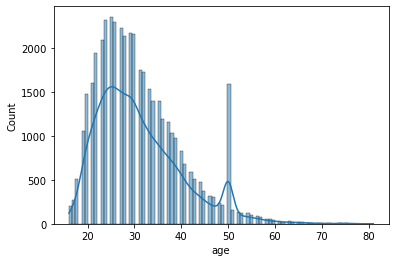

In [21]:
sns.histplot(gabung['age'],kde=True)
plt.show()

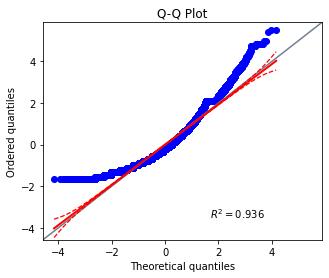

In [22]:
pg.qqplot(gabung['age'],dist='norm')
plt.show()

## Kolmogorov and Smirnov Test

In [23]:
test, pval = stats.kstest(gabung['age'],'norm')
if pval < 0.05:
    print('normal')
else:
    print('not normal')

not normal


C:\Users\johan\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1847: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= np.asarray(_b)) & cond0
C:\Users\johan\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


Because of the data is not normal,tried to fill missing value using median.

## G. Domain

In [24]:
gabung['domain'].value_counts(normalize=True)*100

@gmail.com         85.246327
@yahoo.com          7.015675
@hotmail.com        3.993937
other               1.616691
@icloud.com         0.596701
@qq.com             0.461522
@outlook.com        0.353651
@ymail.com          0.264897
@live.com           0.230761
@163.com            0.147468
@rocketmail.com     0.072369
Name: domain, dtype: float64

### Grouping domain as gmail, yahoo, and others

In [25]:
gabung.loc[(gabung['domain']!='@gmail.com') & (gabung['domain']!='@yahoo.com'),'domain']='other'

In [26]:
gabung['domain'].value_counts(normalize=True)*100

@gmail.com    85.246327
other          7.737998
@yahoo.com     7.015675
Name: domain, dtype: float64

## H. Attr 1,2, & 3

In [27]:
conditions = [(gabung['attr_1'] < 1) & (gabung['attr_2'] > 0) & (gabung['attr_3'] >= 0)]

values = ['1']

gabung['coba1'] = np.select(conditions, values)
gabung['coba1']=gabung['coba1'].astype(int)
korelasi = gabung.corr()['open_flag'].sort_values(ascending=False)*100
korelasi

open_flag                      100.000000
open_frequency                  52.808274
open_count_last_10_days         51.753292
open_count_last_30_days         51.027054
open_count_last_60_days         48.005703
country_code                    15.860649
age                             11.379525
checkout_count_last_10_days      1.543405
checkout_frequency               1.392632
login_count_last_10_days         1.377990
checkout_count_last_30_days      1.344182
coba1                            1.319958
login_frequency                  1.106871
checkout_count_last_60_days      1.024915
login_count_last_30_days         0.993898
login_count_last_60_days         0.839006
attr_2                           0.160299
last_login_day                  -0.135062
user_id                         -0.684910
attr_3                          -1.454131
attr_1                          -1.681698
last_checkout_day               -2.705234
row_id                          -3.617096
subject_line_length             -5

After trying some best pattern for getting best correlation between attribute 1,2 and 3, found best pattern which is :
- Attr 1 : 0
- Attr 2 : 1
- Attr 3 : 0-4

Best combination only resulting correlation around 1% to open_flag(coba1). Hence, attr 1,2, & 3 will be dropped.

In [28]:
gabung.describe()

,country_code,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,...,open_flag,row_id,attr_1,attr_2,attr_3,age,open_frequency,login_frequency,checkout_frequency,coba1
count,73236.000000,73236.000000,73236.000000,73236.000000,73236.000000,73236.000000,73236.000000,73236.000000,73236.000000,73236.00000,...,73236.000000,73236.000000,45163.000000,73236.000000,73236.000000,44390.000000,73236.000000,73236.000000,73236.000000,73236.000000
mean,2.527336,63171.653736,43.624857,109.335341,47.426170,389.417267,0.914550,2.789038,5.034560,8.37558,...,0.155347,36851.325919,0.999756,0.997255,1.077271,31.067808,0.089444,0.831959,0.091527,0.000150
std,1.675662,36002.984750,11.220774,237.176151,110.509655,588.325692,1.756321,4.575717,7.912239,13.42605,...,0.362238,21218.608566,0.015605,0.052317,1.034608,9.043049,0.146460,1.237328,0.246578,0.012255
min,1.000000,2.000000,10.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,31927.250000,34.000000,6.000000,3.000000,10.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,18573.750000,1.000000,1.000000,0.000000,24.000000,0.000000,0.038889,0.000000,0.000000
50%,2.000000,63496.000000,43.000000,18.000000,8.000000,44.000000,0.000000,1.000000,2.000000,3.00000,...,0.000000,36891.500000,1.000000,1.000000,1.000000,29.000000,0.027778,0.366667,0.016667,0.000000
75%,3.000000,94781.500000,52.000000,55.000000,26.000000,459.250000,1.000000,3.000000,6.000000,12.00000,...,0.000000,55219.250000,1.000000,1.000000,2.000000,36.000000,0.105556,1.161111,0.094444,0.000000
max,7.000000,127925.000000,75.000000,808.000000,1445.000000,1445.000000,31.000000,92.000000,135.000000,254.00000,...,1.000000,73538.000000,1.000000,1.000000,4.000000,81.000000,2.805556,23.633333,15.483333,1.000000


# 2. Feature Selection

Some column that will be dropped :
1. attr_1 : Not correlated to open_flag
1. attr_2 : Not correlated to open_flag
1. attr_3 : Not correlated to open_flag
1. coba1 : Not correlated to open_flag
1. user_id : Not correlated to open_flag
1. row_id : Not correlated to open_flag
1. grass_date : Changed by day
1. open_count_last 10,30,60 days : Changed by open_frequency
1. login_count_last 10,30,60 days : Changed by login_frequency
1. checkout_count_last 10,30,60 days : Changed by checkout_frequency
1. subject_line_length : Changed by character_length
1. last_open_day : Changed by last_open_email
1. last_login_day : Changed by last_login_shopee
1. last_checkout_day : Changed by last_checkout_shopee
1. country_code : Changed by country

### awal.csv adalah data untuk pembanding data sebelum dan sesudah dikategorikan

In [29]:
gabung.to_csv('./static/awal.csv')

In [30]:
gabung.drop(['attr_1','attr_2','attr_3','coba1','user_id','row_id','grass_date',
             'open_count_last_10_days','open_count_last_30_days','open_count_last_60_days',
             'login_count_last_10_days','login_count_last_30_days','login_count_last_60_days',
             'checkout_count_last_10_days','checkout_count_last_30_days','checkout_count_last_60_days',
            'subject_line_length','last_open_day','last_login_day','last_checkout_day','country_code'],axis=1,inplace=True)

In [31]:
gabung.isna().sum().sort_values(ascending=False)

age                          28846
checkout_frequency               0
login_frequency                  0
open_frequency                   0
last_time_checkout_shopee        0
last_time_open_shopee            0
last_time_open_email             0
character_length                 0
day                              0
country                          0
domain                           0
open_flag                        0
dtype: int64

In [32]:
gabung[gabung.isnull().any(axis=1)].head(15)

,open_flag,age,domain,country,day,character_length,last_time_open_email,last_time_open_shopee,last_time_checkout_shopee,open_frequency,login_frequency,checkout_frequency
2,0,NaN,@yahoo.com,Thailand,Tuesday,ideal,0-1 year,0-1 year,0-1 year,0.111111,2.227778,0.527778
4,0,NaN,other,Thailand,Tuesday,ideal,0-1 year,0-1 year,0-1 year,0.000000,0.150000,0.000000
8,1,NaN,@yahoo.com,Singapore,Tuesday,ideal,0-1 year,0-1 year,0-1 year,0.150000,0.177778,0.016667
14,0,NaN,other,Malaysia,Tuesday,ideal,2-3 years,0-1 year,0-1 year,0.000000,0.033333,0.005556
15,1,NaN,other,Thailand,Tuesday,ideal,0-1 year,0-1 year,0-1 year,0.711111,1.422222,0.477778
26,0,NaN,@gmail.com,Singapore,Tuesday,not ideal,0-1 year,more than 3 years,more than 3 years,0.000000,0.000000,0.000000
29,0,NaN,other,Philippines,Tuesday,ideal,0-1 year,0-1 year,0-1 year,0.016667,0.061111,0.000000
33,0,NaN,other,Thailand,Tuesday,ideal,0-1 year,0-1 year,0-1 year,0.000000,0.083333,0.005556
37,0,NaN,@gmail.com,Taiwan,Tuesday,ideal,0-1 year,0-1 year,0-1 year,0.016667,0.661111,0.088889
42,0,NaN,other,Philippines,Tuesday,ideal,0-1 year,0-1 year,0-1 year,0.166667,6.122222,0.583333


In [33]:
gabung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73236 entries, 0 to 73235
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   open_flag                  73236 non-null  int64   
 1   age                        44390 non-null  float64 
 2   domain                     73236 non-null  object  
 3   country                    73236 non-null  category
 4   day                        73236 non-null  object  
 5   character_length           73236 non-null  category
 6   last_time_open_email       73236 non-null  category
 7   last_time_open_shopee      73236 non-null  category
 8   last_time_checkout_shopee  73236 non-null  category
 9   open_frequency             73236 non-null  float64 
 10  login_frequency            73236 non-null  float64 
 11  checkout_frequency         73236 non-null  float64 
dtypes: category(5), float64(4), int64(1), object(2)
memory usage: 4.3+ MB


In [34]:
gabung.to_csv('./static/EDA.csv')

In [35]:
gabung.to_csv('./static/modeling.csv')

# For SQL Test

In [1]:
import mysql.connector

In [2]:
con = mysql.connector.connect(
    host = 'localhost',
    user = 'root',
    passwd = 'Funicula8'
)

In [7]:
c = con.cursor(buffered=True)
query = 'show databases'
c.execute(query)
c.fetchall()

[('flask_mysql',),
 ('hotwheels',),
 ('information_schema',),
 ('johan',),
 ('mysql',),
 ('org',),
 ('performance_schema',),
 ('sakila',),
 ('sekolahku',),
 ('sql_hr',),
 ('sql_inventory',),
 ('sql_invoicing',),
 ('sql_store',),
 ('sys',),
 ('ujian_hotwheels',),
 ('world',)]

In [18]:
query = 'USE johan'
c.execute(query)

In [19]:
query = 'SHOW tables'
c.execute(query)
c.fetchall()

[('irin',),
 ('irin2',),
 ('kuis1',),
 ('mencoba',),
 ('no1',),
 ('no2',),
 ('sopi_order',),
 ('sqldata',),
 ('tips',),
 ('user_tab_new',)]

In [20]:
trying = pd.read_sql("SELECT * FROM sqldata",con)

,MyUnknownColumn,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,...,domain,country,day,character_length,last_time_open_email,last_time_open_shopee,last_time_checkout_shopee,open_frequency,login_frequency,checkout_frequency
0,0,44,19.0,6.0,18.0,0,2,4,12,43,...,@gmail.com,Philippines,Tuesday,ideal,0-1 year,0-1 year,0-1 year,0.044444,1.427778,0.111111
1,1,44,9.0,4.0,8.0,2,9,17,18,48,...,other,Philippines,Tuesday,ideal,0-1 year,0-1 year,0-1 year,0.261111,1.633333,0.066667
2,2,49,14.0,5.0,5.0,0,4,12,24,69,...,@yahoo.com,Thailand,Tuesday,ideal,0-1 year,0-1 year,0-1 year,0.111111,2.227778,0.527778
3,3,49,49.0,9.0,53.0,0,0,1,9,23,...,@yahoo.com,Singapore,Tuesday,ideal,0-1 year,0-1 year,0-1 year,0.005556,0.938889,0.100000
4,4,49,227.0,6.0,221.0,0,0,0,2,5,...,other,Thailand,Tuesday,ideal,0-1 year,0-1 year,0-1 year,0.000000,0.150000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73231,73231,49,24.0,1083.0,1087.0,0,3,4,0,0,...,@gmail.com,Indonesia,Monday,ideal,0-1 year,2-3 years,2-3 years,0.055556,0.000000,0.000000
73232,73232,39,24.0,36.0,279.0,0,1,1,0,0,...,other,Thailand,Monday,ideal,0-1 year,0-1 year,0-1 year,0.016667,0.000000,0.000000
73233,73233,38,46.0,10.0,51.0,0,0,1,0,0,...,@gmail.com,Malaysia,Monday,ideal,0-1 year,0-1 year,0-1 year,0.005556,0.000000,0.000000
73234,73234,38,5.0,34.0,1445.0,2,4,4,0,0,...,@gmail.com,Malaysia,Monday,ideal,0-1 year,0-1 year,more than 3 years,0.133333,0.000000,0.000000
